In [1]:
!pip install netcdf4

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import netCDF4
import numpy as np
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

# For Apr-Mar

In [3]:
file = "da_hydro_AprMar_r.1-2000_d.05-Jan-2018.nc"
f = netCDF4.Dataset(file)

In [4]:
print(f.variables.keys()) # get all variable names

dict_keys(['lat', 'lon', 'time', 'tmon', 'tas_mn', 'tas_sg', 'tas_pc', 'pdsi_mn', 'pdsi_sg', 'pdsi_pc', 'spei_mn', 'spei_sg', 'spei_pc', 'Nino_12_mn', 'Nino_12_sg', 'Nino_12_pc', 'Nino_3_mn', 'Nino_3_sg', 'Nino_3_pc', 'Nino_3.4_mn', 'Nino_3.4_sg', 'Nino_3.4_pc', 'Nino_4_mn', 'Nino_4_sg', 'Nino_4_pc', 'PacDelSST_mn', 'PacDelSST_sg', 'PacDelSST_pc', 'Atl_mn', 'Atl_sg', 'Atl_pc', 'Pac130_mn', 'Pac130_sg', 'Pac130_pc', 'Pac160_mn', 'Pac160_sg', 'Pac160_pc', 'EPac_mn', 'EPac_sg', 'EPac_pc', 'WPac_mn', 'WPac_sg', 'WPac_pc', 'SAsia_mn', 'SAsia_sg', 'SAsia_pc', 'IndOcn_mn', 'IndOcn_sg', 'IndOcn_pc', 'SAmer_mn', 'SAmer_sg', 'SAmer_pc', 'Ind_mn', 'Ind_sg', 'Ind_pc', 'Afr_mn', 'Afr_sg', 'Afr_pc', 'EAfr_mn', 'EAfr_sg', 'EAfr_pc', 'gmt_mn', 'gmt_sg', 'gmt_pc', 'amo_mn', 'amo_sg', 'amo_pc'])


In [5]:
all_vars = []
nino_12_mn = f.variables['Nino_12_mn'] # Nino_12_mn variable
all_vars.append(nino_12_mn)
nino_3_mn = f.variables['Nino_3_mn'] # Nino_3_mn variable
all_vars.append(nino_3_mn)
nino_34_mn = f.variables['Nino_3.4_mn'] # Nino_3.4_mn variable
all_vars.append(nino_34_mn)
nino_4_mn = f.variables['Nino_4_mn'] # Nino_4_mn variable
all_vars.append(nino_4_mn)

for var in all_vars:
    print(var)
    print()

<class 'netCDF4._netCDF4.Variable'>
float64 Nino_12_mn(tmon)
    long_name: Nino 1+2 (reconstruction mean)
    units: degC
unlimited dimensions: 
current shape = (24000,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 Nino_3_mn(tmon)
    long_name: Nino 3 (reconstruction mean)
    units: degC
unlimited dimensions: 
current shape = (24000,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 Nino_3.4_mn(tmon)
    long_name: Nino 3.4 (reconstruction mean)
    units: degC
unlimited dimensions: 
current shape = (24000,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 Nino_4_mn(tmon)
    long_name: Nino 4 (reconstruction mean)
    units: degC
unlimited dimensions: 
current shape = (24000,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [6]:
MIN_YEAR = 1630
MAX_YEAR = 1690

In [7]:
columns = ['ID', 'Year', 'Index', 'Index Kind']

In [8]:
df = pd.DataFrame(columns=columns)

In [9]:
index_kind = ['Nino 1+2', 'Nino 3', 'Nino 3.4', 'Nino 4']
i = 0
for year in range(MIN_YEAR, MAX_YEAR+1):
    year_indices = []
    for month in range(12):
        
        year_indices.append([nino_12_mn[year*12+month], nino_3_mn[year*12+month], nino_34_mn[year*12+month], \
                   nino_4_mn[year*12+month]])
        
    year_indices = np.asarray(year_indices)
    yearly_means = np.mean(year_indices, axis=0)
        
    for j in range(len(index_kind)):
        new_row = {'ID': i, 'Year': year, 'Index': yearly_means[j], \
                  'Index Kind': index_kind[j]}
        df = df.append(new_row, ignore_index=True)   
        i += 1

In [10]:
df.head(20)

,ID,Year,Index,Index Kind
0,0,1630,20.709888,Nino 1+2
1,1,1630,23.875785,Nino 3
2,2,1630,25.052935,Nino 3.4
3,3,1630,26.748841,Nino 4
4,4,1631,21.658507,Nino 1+2
5,5,1631,25.256674,Nino 3
6,6,1631,26.355944,Nino 3.4
7,7,1631,27.653589,Nino 4
8,8,1632,22.653351,Nino 1+2
9,9,1632,26.650984,Nino 3


In [11]:
# start plotting

# set some colors

# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#524f4f", # location1      (gray)
    "#11A579", # location2      (sage green)
    "#E73F74", # location5      (bold pink)
    "#E68310", # location6      (orange)        
]

# Vertical lines every 10 years
VLINES = np.arange(1630, 1690, 10)

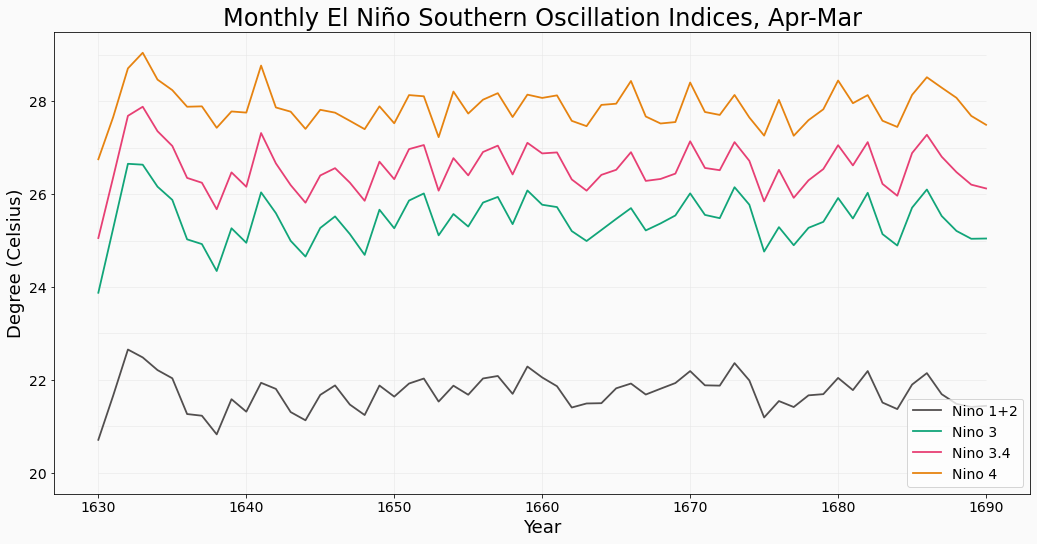

In [21]:
# El nino index graph

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(20, 30), xmin=1630, xmax=1690, color=GREY91, lw=0.6)
# # Darker horizontal line at y=0
# ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('Yearly El Niño Southern Oscillation Indices, Apr-Mar', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('Degree (Celsius)', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------

for idx, kind in enumerate(df["Index Kind"].unique()):
    data = df[df["Index Kind"] == kind]
    color = COLOR_SCALE[idx]
    ax.plot("Year", "Index", color=color, lw=1.8, data=data, label=kind)
    ax.legend(loc='lower right', fontsize='14')

In [87]:
f.close()

# For JJA

In [88]:
file = "da_hydro_JunAug_r.1-2000_d.05-Jan-2018.nc"
f = netCDF4.Dataset(file)

In [89]:
all_vars = []
nino_12_mn = f.variables['Nino_12_mn'] # Nino_12_mn variable
all_vars.append(nino_12_mn)
nino_3_mn = f.variables['Nino_3_mn'] # Nino_3_mn variable
all_vars.append(nino_3_mn)
nino_34_mn = f.variables['Nino_3.4_mn'] # Nino_3.4_mn variable
all_vars.append(nino_34_mn)
nino_4_mn = f.variables['Nino_4_mn'] # Nino_4_mn variable
all_vars.append(nino_4_mn)

for var in all_vars:
    print(var)
    print()

<class 'netCDF4._netCDF4.Variable'>
float64 Nino_12_mn(tmon)
    long_name: Nino 1+2 (reconstruction mean)
    units: degC
unlimited dimensions: 
current shape = (24000,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 Nino_3_mn(tmon)
    long_name: Nino 3 (reconstruction mean)
    units: degC
unlimited dimensions: 
current shape = (24000,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 Nino_3.4_mn(tmon)
    long_name: Nino 3.4 (reconstruction mean)
    units: degC
unlimited dimensions: 
current shape = (24000,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 Nino_4_mn(tmon)
    long_name: Nino 4 (reconstruction mean)
    units: degC
unlimited dimensions: 
current shape = (24000,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [90]:
df = pd.DataFrame(columns=columns)

In [91]:
index_kind = ['Nino 1+2', 'Nino 3', 'Nino 3.4', 'Nino 4']
i = 0
for year in range(MIN_YEAR, MAX_YEAR+1):
    for month in range(12):
        
        indices = [nino_12_mn[year*12+month], nino_3_mn[year*12+month], nino_34_mn[year*12+month], \
                   nino_4_mn[year*12+month]] 
        
        date = round(year + 1/12 * month, 3)
        
        for j in range(len(index_kind)):
            new_row = {'ID': i, 'Year': year, 'Month': month, 'Date': date, 'Index': indices[j], \
                      'Index Kind': index_kind[j]}
            df = df.append(new_row, ignore_index=True)   
            i += 1

In [92]:
df.head(20)

,ID,Year,Month,Date,Index,Index Kind
0,0,1630,0,1630.000,22.904258812518787,Nino 1+2
1,1,1630,0,1630.000,25.99475410517826,Nino 3
2,2,1630,0,1630.000,26.618834009788838,Nino 3.4
3,3,1630,0,1630.000,28.079705716305543,Nino 4
4,4,1630,1,1630.083,21.640297658544846,Nino 1+2
5,5,1630,1,1630.083,25.72819229730937,Nino 3
6,6,1630,1,1630.083,26.830052649470584,Nino 3.4
7,7,1630,1,1630.083,28.249374955492762,Nino 4
8,8,1630,2,1630.167,20.306087352096014,Nino 1+2
9,9,1630,2,1630.167,24.810027517180764,Nino 3


In [93]:
# start plotting

# set some colors

# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#524f4f", # location1      (gray)
    "#11A579", # location2      (sage green)
    "#E73F74", # location5      (bold pink)
    "#E68310", # location6      (orange)        
]

# Vertical lines every 10 years
VLINES = np.arange(1630, 1690, 10)

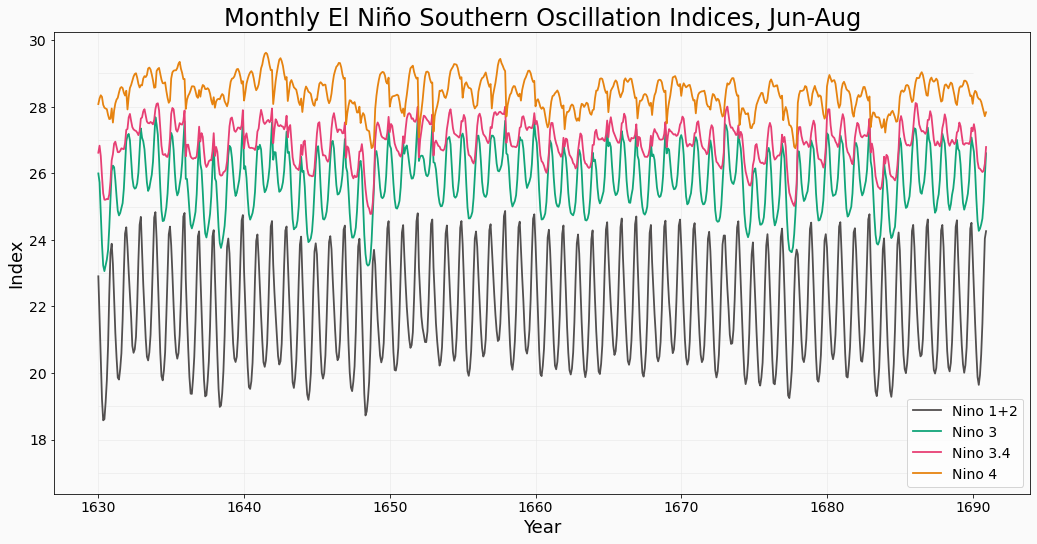

In [96]:
# El nino index graph

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (17.5, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(17, 30), xmin=1630, xmax=1690, color=GREY91, lw=0.6)

# # Darker horizontal line at y=0
# ax.hlines(y=0, xmin=1630, xmax=1690, color=GREY60, lw=1.6)


# add labels
ax.set_title('Monthly El Niño Southern Oscillation Indices, Jun-Aug', fontsize='24')
ax.set_xlabel('Year', fontsize='18')
ax.set_ylabel('Index', fontsize='18')

# adjust the tick size
ax.tick_params(axis='x', labelsize=14)  # Adjust label size for x-axis ticks
ax.tick_params(axis='y', labelsize=14)  # Adjust label size for y-axis ticks


# Add lines ------------------------------------------------------

for idx, kind in enumerate(df["Index Kind"].unique()):
    data = df[df["Index Kind"] == kind]
    color = COLOR_SCALE[idx]
    ax.plot("Date", "Index", color=color, lw=1.8, data=data, label=kind)
    ax.legend(fontsize='14')

In [95]:
f.close()